# [Kaggle Digit Recognizer Challenge](https://www.kaggle.com/competitions/digit-recognizer)
From https://www.datacamp.com/tutorial/xgboost-in-python

In [43]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import matplotlib.pyplot as plt
from PIL import Image

mnist_train = pd.read_csv("/home/rainer/Downloads/ML_datasets/mnist_train.csv")

mnist_test = pd.read_csv("/home/rainer/Downloads/ML_datasets/mnist_test.csv")

X, Y = mnist_train.drop('label', axis=1), mnist_train[['label']]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [23]:


class MnistDataset(Dataset):
    def __init__(self, dataframe):

        X, Y = dataframe.drop('label', axis=1), dataframe[['label']]
        self.Xdataset =

        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Extract features and target from the dataframe
        image=X.iloc[0].to_numpy().reshape(28, 28)


        features = self.dataframe.loc[idx, ['feature1', 'feature2', ..., 'featureN']].values.astype('float32')
        target = self.dataframe.loc[idx, 'target']

        sample = {'features': features, 'target': target}

        # Apply transformations if any
        if self.transform:
            sample = self.transform(sample)

        return sample



SyntaxError: invalid syntax (785756589.py, line 27)

In [18]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10) #modify the last layer to output 10 classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


Using cache found in /home/rainer/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

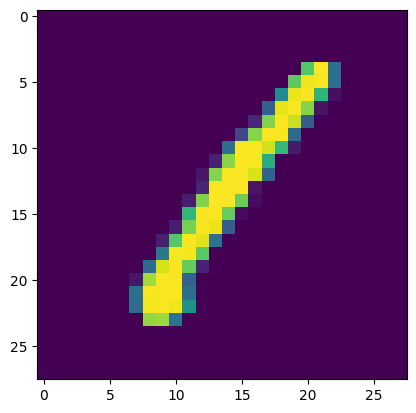

In [32]:

image=X.iloc[0].to_numpy().reshape(28, 28)
plt.imshow(image)

In [37]:

image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [44]:
transform = transforms.Compose([
    transforms.Resize((224, 224), Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
transform(torch.tensor(image))

/home/rainer/.cache/torch/hub/pytorch_vision_v0.10.0/torchvision/transforms/transforms.py:280: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [28] and output size of [224, 224]. Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

In [ ]:
def train_model(model, criterion, optimizer, dataloader, device, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(dataloader)}")

train_model(model, criterion, optimizer, train_loader, device, epochs=5)


In [ ]:
predictionsDf = pd.DataFrame(predictions, columns=["Label"])
predictionsDf.insert(0, 'ImageId', range(1, len(predictionsDf) + 1))
predictionsDf["Label"] = predictionsDf["Label"].astype(int)

In [ ]:
predictionsDf

In [ ]:
predictionsDf.to_csv('/home/rainer/Downloads/ML_datasets/mnist_test_prediction.csv', index=False)